In [56]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%aimport common

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [58]:
def show_image(img):
    if img is None:
        print('None!')
        return 
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
def load_img(n=None):
    fname = n or 1
    
    #img = cv2.imread("./img/%d.jpg" % fname)
    img = cv2.imread("/home/petr/Program files/Python_projects/Haugh/hough-circles-cvlab-master/img/Cars/%d.jpg" % fname)
    return fname, img

In [59]:
def foo(img):
    gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    d = min(gimg.shape)
    
    circles = cv2.HoughCircles(gimg, cv2.HOUGH_GRADIENT, 1, minDist=15,
                               param1=50,
                               param2=30, minRadius=45, maxRadius=60)
    
    if circles is None:
        return
    timg = img.copy()
    for i in circles[0, :]:
        cv2.circle(timg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(timg, (i[0], i[1]), 2, (0, 0, 255), 3)
    return timg

1


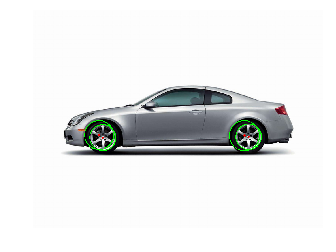

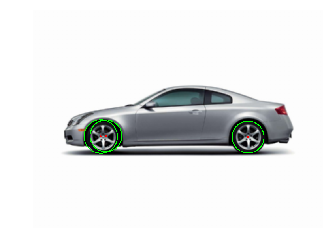

2


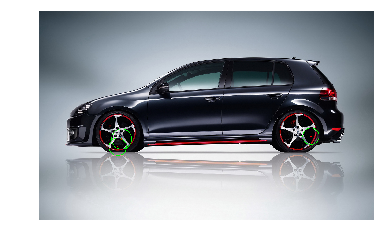

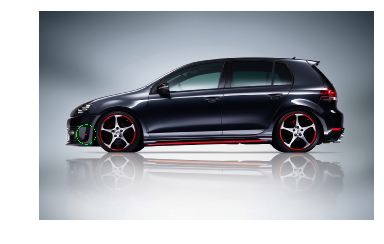

3


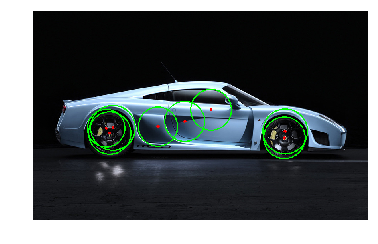

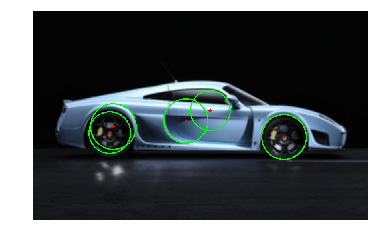

4


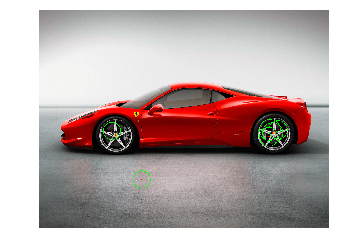

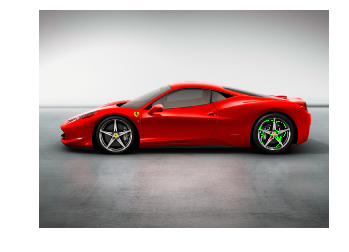

5


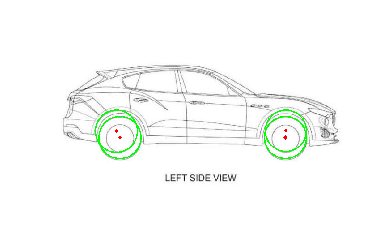

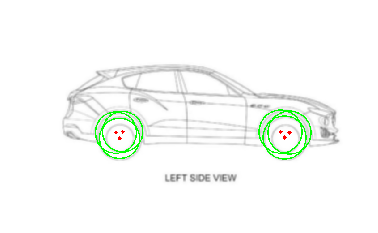

6


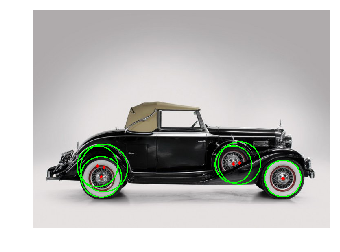

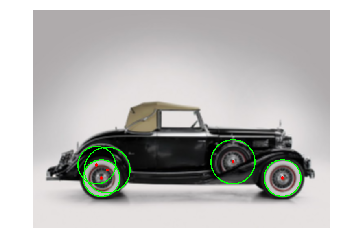

7


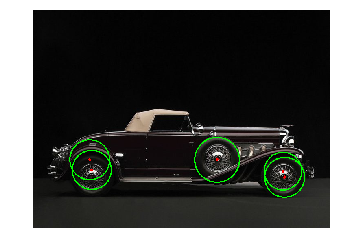

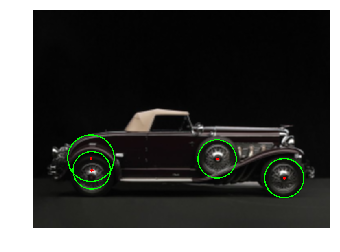

8
None!
None!
9
None!
None!
10
None!
None!
11


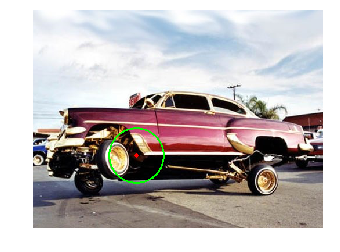

None!
12


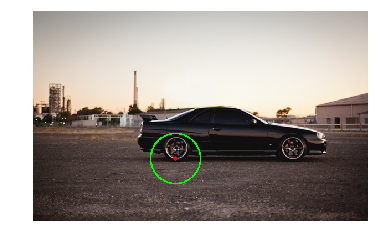

None!
13


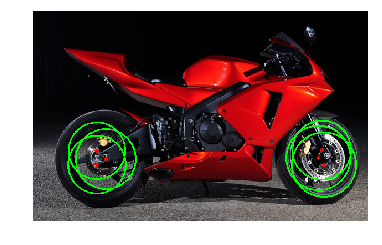

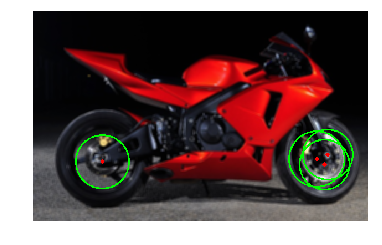

14


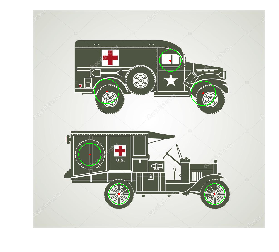

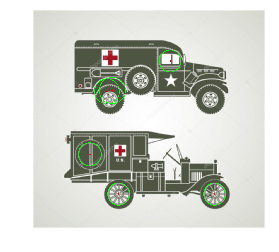

15


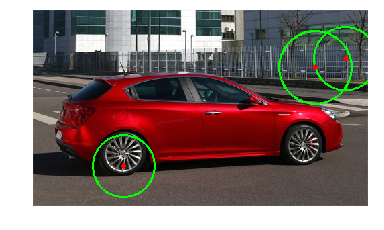

None!
16


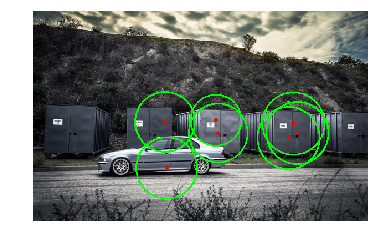

None!
17
None!
None!
18


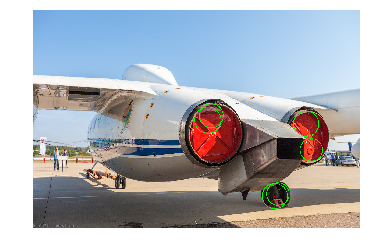

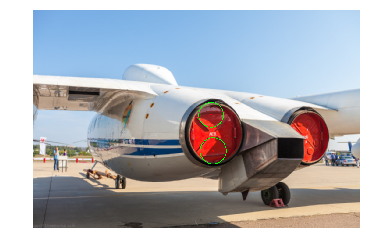

19


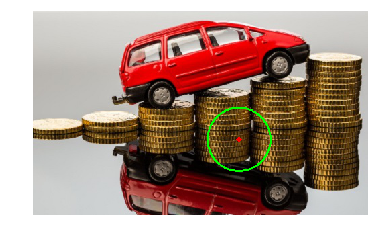

None!
20


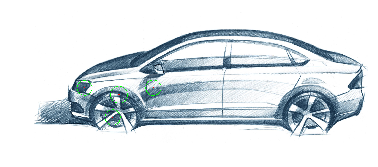

None!
21


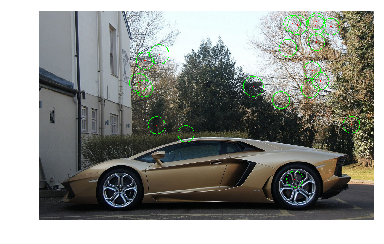

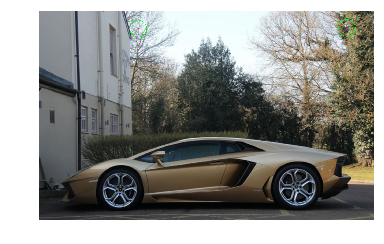

22


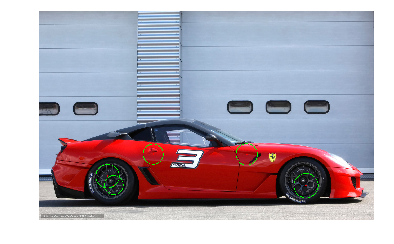

None!
23


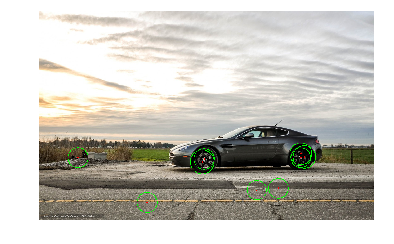

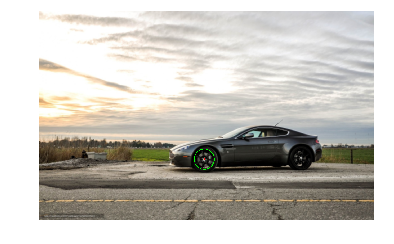

24


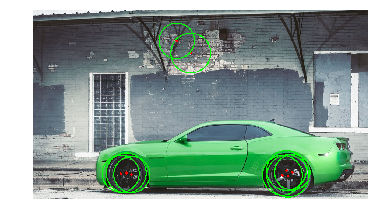

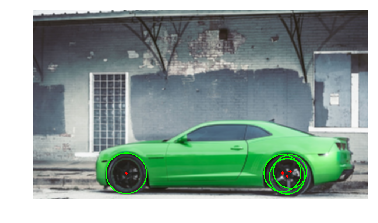

25


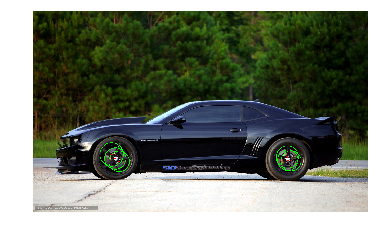

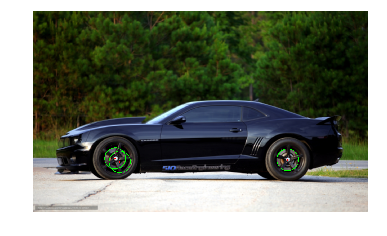

26


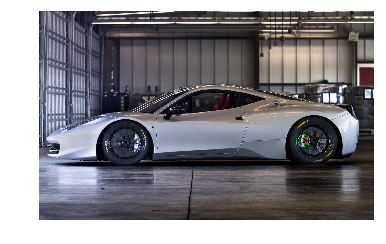

None!
27


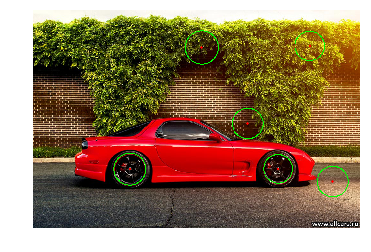

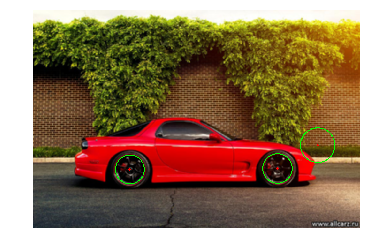

In [60]:
for i in range(1,28):
    _, img = load_img(i)
    # show_image(img)
    if img is None:
        continue
    print(i)
    show_image(foo(img))   
    bimg = cv2.blur(img, (5,5))
    show_image(foo(bimg))

In [61]:
#Реализация определения наличия машины на картинке

In [77]:
def wheelDetector(img, min_Rad, max_Rad, accumulatorThreshold):
    gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    d = min(gimg.shape)
    
    circles = cv2.HoughCircles(gimg, cv2.HOUGH_GRADIENT, 1, minDist=15,
                               param1=50,
                               param2=accumulatorThreshold, minRadius=min_Rad, maxRadius=max_Rad)
    
    if circles is None:
        return
    timg = img.copy()
    hasCar = False
    for i in circles[0, :]:
        cv2.circle(timg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(timg, (i[0], i[1]), 2, (0, 0, 255), 3)
        for j in circles[0, :]:
            if (abs(i[0] - j[0]) >= 10) and (abs(i[1] - j[1]) <= 20) and (abs(i[2] != j[2]) <= 10):
                hasCar = True
    
    return timg, hasCar

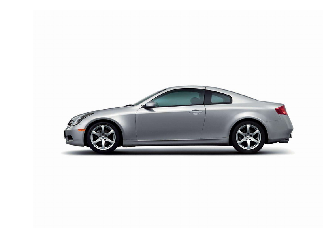

In [79]:
image_number = 1
_, img = load_img(image_number)
show_image(img)

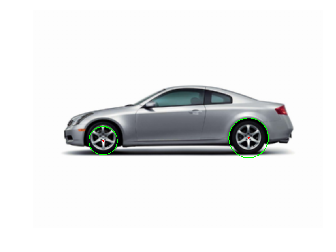

Car is here


In [81]:
bimg = cv2.blur(img, (5,5))
#for accThr in range(150, 50, -5):
minR = 50
maxR = 100
accThr = 70
hasCar = False
while (accThr >=50) and (not hasCar) :   
#show_image(foo2(img, minR, maxR, accThr))   
    foo2_img, hasCar = wheelDetector(bimg, minR, maxR, accThr)
    accThr -= 5
if hasCar:
    show_image(foo2_img)
    print("Car is here")
else:
    print("This image don't has car")

In [65]:
def FFF(x):
    return x*x

In [66]:
print(FFF(11))

121
